In [2]:
from matplotlib import pyplot as plt
import pickle

sts = pickle.load(open('/home/msun415/SynTreeNet/results/viz/skeletons-train.pkl', 'rb'))



/tmp/ipykernel_2156169/3431579367.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0,10000])


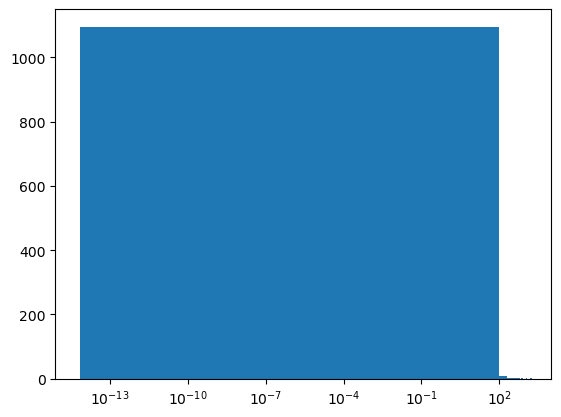

In [20]:
# histogram of counts

counts = [len(vals) for vals in sts.values()]
fig, ax = plt.subplots(1,1)
ax.hist(counts,bins=1000)
ax.set_xscale('log')
ax.set_xlim([0,10000])
fig.savefig('/home/msun415/hist.png')


In [16]:
counts

[328,
 100266,
 7317,
 11749,
 29,
 1539,
 1147,
 63,
 753,
 1721,
 4932,
 89,
 3,
 92,
 177,
 154,
 142,
 464,
 1110,
 15,
 503,
 186,
 159,
 221,
 47,
 211,
 33,
 1,
 63,
 122,
 4,
 40,
 7,
 21,
 47,
 22,
 121,
 17,
 17,
 233,
 7,
 34,
 16,
 80,
 171,
 10,
 12,
 3,
 5,
 1,
 1,
 4,
 1,
 22,
 2,
 2,
 1,
 22,
 4,
 9,
 12,
 1,
 6,
 1,
 10,
 15,
 3,
 22,
 1,
 1,
 2,
 5,
 1,
 1,
 88,
 6,
 33,
 12,
 34,
 1,
 1,
 4,
 1,
 29,
 42,
 8,
 1,
 13,
 5,
 4,
 1,
 2,
 1,
 13,
 1,
 1,
 2,
 13,
 1,
 1,
 1,
 6,
 17,
 111,
 5,
 5,
 2,
 17,
 25,
 4,
 1,
 7,
 16,
 9,
 2,
 25,
 4,
 1,
 12,
 12,
 25,
 4,
 1,
 1,
 2,
 1,
 14,
 2,
 3,
 1,
 1,
 24,
 1,
 50,
 1,
 20,
 1,
 1,
 3,
 1,
 4,
 5,
 33,
 1,
 5,
 1,
 3,
 3,
 3,
 1,
 4,
 5,
 10,
 2,
 5,
 12,
 22,
 1,
 4,
 1,
 4,
 1,
 1,
 11,
 1,
 1,
 8,
 1,
 1,
 24,
 7,
 2,
 8,
 11,
 1,
 16,
 1,
 2,
 10,
 1,
 1,
 1,
 1,
 15,
 1,
 1,
 3,
 5,
 1,
 1,
 17,
 5,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 28,
 3,
 1,
 2,
 1,
 28,
 3,
 2,
 14,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 4,
 2,
 1,
 

In [2]:
from synnet.utils.data_utils import SkeletonSet
import random
random.seed(42)
for st in sts:
    random.shuffle(sts[st])
    sts[st] = sts[st][:10]
sk_set = SkeletonSet().load_skeletons(sts)

In [3]:
sk_set.embed_skeletons()

begin computing similarity matrix


100%|██████████| 625521/625521 [01:27<00:00, 7115.38it/s] 


begin mds


/home/msun415/miniconda3/envs/synnet/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1 with stress 828759420.0285318
breaking at iteration 1 with stress 828442940.6316681
breaking at iteration 1 with stress 828414469.4267238
breaking at iteration 1 with stress 828356423.4770769


1061

In [5]:
import numpy as np 
from synnet.encoding.fingerprints import fp_4096
from synnet.utils.reconstruct_utils import fetch_oracle

mols = []
for smi in sk_set.lookup:
    for sk in sk_set.lookup[smi]:
        mols.append((sk.index, sk.tree.nodes[sk.tree_root]['smiles']))
oracle = fetch_oracle('drd2')
scores = [oracle(mol_sk[1]) for mol_sk in mols]





17:33:26 faiss.loader INFO: Loading faiss with AVX2 support.
17:33:26 faiss.loader INFO: Successfully loaded faiss with AVX2 support.


In [33]:
len(sk_set.lookup), len(mols), len(sk_set.sks)

1061

In [23]:
fp_dist = np.zeros((len(mols), len(mols)))
fps = [np.array(fp_4096(mol_sk[1])) for mol_sk in mols]
for i in range(len(mols)):
    for j in range(len(mols)):
        fp_dist[i, j] = np.abs(fps[i]-fps[j]).sum()

max_dist = sk_set.sim.max()
max_fp_dist = fp_dist.max()

dists = np.zeros((len(mols), len(mols)))
for i in range(len(mols)):
    for j in range(len(mols)):
        index1 = mols[i][0]
        index2 = mols[j][0]
        dists[i][j] = sk_set.sim[index1][index2]/max_dist + fp_dist[i][j]/max_fp_dist

In [32]:
mols[:3]

[(0,
  'Cn1c(Nc2cc([N+](=O)[O-])c(N3CCC(Cc4cccc(O)c4)CC3)cc2N)c(-c2nn[nH]n2)c(=O)n(C)c1=O'),
 (0,
  'Cn1c(Nc2cc([N+](=O)[O-])c(N3CCC(Cc4cccc(O)c4)CC3)cc2N)c(-c2nn[nH]n2)c(=O)n(C)c1=O'),
 (0,
  'Cn1c(Nc2cc([N+](=O)[O-])c(N3CCC(Cc4cccc(O)c4)CC3)cc2N)c(-c2nn[nH]n2)c(=O)n(C)c1=O')]

In [ ]:
fig = plt.Figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(coords[:,0], coords[:,1], c=scores, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Score')

In [1]:
skeletons = pickle.load(open('results/viz/skeletons.pkl'), 'rb')
# if hasattr(args, 'strategy') and args.strategy == 'topological':
#     globals()['all_topological_sorts'] = {}
#     for index in SKELETON_INDEX:
#         sk = Skeleton(sks[index], index)
#         if sk.rxns.sum() > args.max_num_rxns: # ignore, won't use to decode
#             continue
#         top_sorts = nx.all_topological_sorts(sk.tree)
#         top_sort_set = set()
#         for top_sort in top_sorts:
#             top_sort = [n for n in top_sort if sk.rxns[n] or sk.leaves[n]]
#             top_sort_set.add(tuple(top_sort))    
#         tree_key = serialize_string(sk.tree, sk.tree_root)
#         globals()['all_topological_sorts'][tree_key] = list(top_sort_set)
# globals()['mc_adj'] = build_mc(args.max_num_rxns)

NameError: name 'pickle' is not defined

In [ ]:
len(skeletons)